<a href="https://colab.research.google.com/github/roguesoul18/FashionMNIST/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MNIST-Classification**

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. It shares the same image size and structure of training and testing splits.

In [26]:
# Importing important libraries

import torch
import torchvision.transforms as transforms
import torchvision.datasets as td
from torch.utils.data import random_split
from torch.utils.data import DataLoader
import random
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
# Downloading the dataset from torchvisions.datasets

dataset = td.FashionMNIST(
    root = './data/FashionMNIST',
    train = True,
    download = True,
    transform = transforms.Compose([
        transforms.ToTensor()                                 
    ])
)

In [28]:
len(dataset)

60000

This block gives the classes of the dataset viz. the literal names of different outfits.

In [29]:
dataset[0]
print(dataset.classes)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [30]:
# Printing the shape of each image tensor along with its label

img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 9


In [31]:
# Splitting the data into training set and validation set

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [32]:
# Setting up a batch size and alloting it to DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [33]:
# Simple logistic regression model

import torch.nn as nn

input_size = 28*28
num_classes = 10
model = nn.Linear(input_size, num_classes)

In [34]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
model = MnistModel()

In [35]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [36]:
for images, labels in train_loader:
    print(images.shape)
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

torch.Size([128, 1, 28, 28])
outputs.shape :  torch.Size([128, 10])
Sample outputs :
 tensor([[ 0.1246, -0.0167,  0.2739,  0.2455,  0.0529,  0.0515,  0.1162,  0.2190,
          0.2593, -0.1207],
        [-0.2217, -0.0376,  0.2758,  0.3514, -0.3932, -0.2194,  0.1723, -0.0222,
         -0.1001, -0.0056]])


In [37]:
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[0]).item())

Sample probabilities:
 tensor([[0.0996, 0.0865, 0.1157, 0.1125, 0.0928, 0.0926, 0.0988, 0.1095, 0.1140,
         0.0780],
        [0.0798, 0.0959, 0.1312, 0.1415, 0.0672, 0.0799, 0.1183, 0.0974, 0.0901,
         0.0990]])
Sum:  0.9999999403953552


In [38]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([2, 3, 3, 3, 3, 0, 2, 3, 2, 3, 3, 3, 3, 3, 5, 7, 7, 3, 2, 3, 3, 5, 2, 3,
        3, 0, 8, 3, 3, 3, 6, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        7, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 8, 3, 8, 3, 3, 3, 3, 3, 2, 2, 3, 8,
        3, 2, 8, 5, 3, 5, 3, 2, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 2, 3, 3, 3,
        3, 3, 3, 0, 5, 7, 8, 3, 3, 4, 7, 3, 3, 3, 3, 3, 3, 7, 3, 5, 3, 3, 3, 3,
        3, 8, 3, 3, 3, 2, 3, 5])
tensor([0.1157, 0.1415, 0.1224, 0.1548, 0.1145, 0.1118, 0.1571, 0.1258, 0.1545,
        0.1245, 0.1187, 0.1385, 0.1311, 0.1667, 0.1263, 0.1475, 0.1291, 0.1499,
        0.1381, 0.1549, 0.1167, 0.1272, 0.1252, 0.1444, 0.1219, 0.1324, 0.1192,
        0.1159, 0.1307, 0.1425, 0.1258, 0.1231, 0.1271, 0.1231, 0.1469, 0.1367,
        0.1184, 0.1560, 0.1111, 0.1682, 0.1502, 0.1254, 0.1248, 0.1519, 0.1275,
        0.1102, 0.1514, 0.1697, 0.1172, 0.1462, 0.1532, 0.1120, 0.1320, 0.1179,
        0.1285, 0.1380, 0.1096, 0.1378, 0.1453, 0.1744, 0.1452, 0.1305, 0.1183,
       

In [39]:
torch.sum(preds == labels)

tensor(15)

In [40]:
# Accuracy function
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

loss_fn = F.cross_entropy

# Loss for current batch of data
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3026, grad_fn=<NllLossBackward>)


In [41]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results
    
    for epoch in range(epochs):
        
        # Training Phase 
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [42]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [43]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out
    
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))
    
model = MnistModel()

In [44]:
result0 = evaluate(model, val_loader)
result0

{'val_acc': 0.022745253518223763, 'val_loss': 2.3448030948638916}

In [45]:
# Running the model

history1 = fit(20, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.7171, val_acc: 0.5938
Epoch [1], val_loss: 1.4228, val_acc: 0.6503
Epoch [2], val_loss: 1.2540, val_acc: 0.6652
Epoch [3], val_loss: 1.1455, val_acc: 0.6776
Epoch [4], val_loss: 1.0697, val_acc: 0.6869
Epoch [5], val_loss: 1.0133, val_acc: 0.6957
Epoch [6], val_loss: 0.9697, val_acc: 0.7037
Epoch [7], val_loss: 0.9341, val_acc: 0.7125
Epoch [8], val_loss: 0.9049, val_acc: 0.7192
Epoch [9], val_loss: 0.8803, val_acc: 0.7268
Epoch [10], val_loss: 0.8591, val_acc: 0.7346
Epoch [11], val_loss: 0.8403, val_acc: 0.7395
Epoch [12], val_loss: 0.8236, val_acc: 0.7448
Epoch [13], val_loss: 0.8089, val_acc: 0.7484
Epoch [14], val_loss: 0.7956, val_acc: 0.7526
Epoch [15], val_loss: 0.7834, val_acc: 0.7546
Epoch [16], val_loss: 0.7724, val_acc: 0.7575
Epoch [17], val_loss: 0.7622, val_acc: 0.7600
Epoch [18], val_loss: 0.7529, val_acc: 0.7622
Epoch [19], val_loss: 0.7440, val_acc: 0.7651


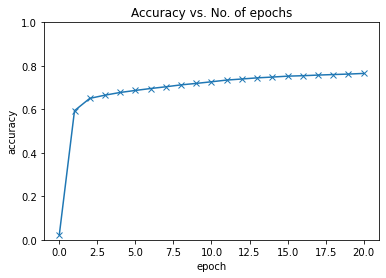

In [46]:
# Plotting the data

history = [result0] + history1
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.ylim(0.0, 1.0)
plt.title('Accuracy vs. No. of epochs');

Label: 9 , ' Ankle boot ' , Predicted: (9, 'Ankle boot')


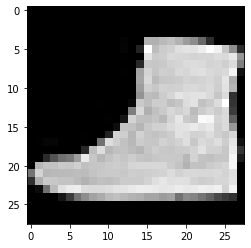

In [53]:
# Testing the trained model

import random
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item(), dataset.classes[preds[0].item()]

a = random.randrange(0, 60000)
img, label = dataset[a]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ',', "'", dataset.classes[label], "'", ', Predicted:', predict_image(img, model))